In [35]:
import os
import sys
import importlib
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn



import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import redfin
import homepricemodels

importlib.reload(redfin)
importlib.reload(homepricemodels)



pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

seaborn.set_context(context='talk')

In [2]:
!pwd
!ls

/Users/timcodes/ds/metis/metisgh/02_Luther/Luther
LICENSE
README.md
__pycache__
explore_luther.ipynb
geckodriver.log
homepricemodels.py
pickles
rappold_tim_challenge_05_linear_splitting.ipynb
redfin.py
redfin_2018-04-18-08-51-54.csv


In [9]:
combined_home_stats = homepricemodels.load_all_home_stats(pickle_file='pickles/combined_home_stats.pkl')

df_clean = homepricemodels.clean_home_stats_df(combined_home_stats)
df_clean = homepricemodels.get_engineered_features(df_clean)

df = df_clean.copy()

df.shape

(4390, 47)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 2 to 10684
Data columns (total 46 columns):
Baths                        4390 non-null float64
Beds                         4390 non-null float64
County                       4390 non-null object
Last Sold                    4390 non-null datetime64[ns]
Sales Price                  4390 non-null float64
Style                        4390 non-null object
Total Sq. Ft.                4390 non-null float64
Year Built                   4390 non-null float64
Year Renovated               4390 non-null float64
Zip Code                     4390 non-null object
rURL                         4390 non-null object
Lot Size Sq. Ft.             4390 non-null float64
Weeks ago                    4390 non-null int64
City                         4390 non-null object
Month Sold                   4390 non-null int64
Year Sold                    4390 non-null int64
Log Sales Price              4390 non-null float64
Condo/Co-op                  

In [1001]:
df.loc[:,'Baths':'Log Sales Price']

,Baths,Beds,County,Last Sold,Sales Price,Style,Total Sq. Ft.,Year Built,Year Renovated,Zip Code,rURL,Lot Size Sq. Ft.,Weeks ago,City,Month Sold,Year Sold,Log Sales Price
2,1.0,2.0,Los Angeles County,2017-06-02,475000.0,Single Family Residential,864.0,1926.0,1926.0,90301,/CA/Inglewood/110-E-Hardy-St-90301/home/6459725,3431.0,-47,Los Angeles,6,2017,5.7
6,2.0,3.0,Los Angeles County,2015-07-21,2285000.0,Single Family Residential,1700.0,1941.0,1985.0,90403,/CA/Santa-Monica/1020-25th-St-90403/home/6769299,6096.0,-144,Los Angeles,7,2015,6.4
8,2.0,4.0,Alameda County,2017-05-10,1100000.0,Single Family Residential,2193.0,1959.0,1960.0,94605,/CA/Oakland/4235-Bemis-St-94605/home/1287711,39639.6,-50,Oakland,5,2017,6.0
9,3.0,4.0,Alameda County,2015-10-14,1375000.0,Single Family Residential,2534.0,1964.0,1966.0,94611,/CA/Oakland/6609-Colton-Blvd-94611/home/1533713,7848.0,-132,Oakland,10,2015,6.1
11,1.0,3.0,Alameda County,2016-03-25,252000.0,Single Family Residential,1585.0,1945.0,1945.0,94605,/CA/Oakland/8833-Dowling-St-94605/home/1801209,4000.0,-109,Oakland,3,2016,5.4
14,1.0,2.0,Alameda County,2016-04-12,660000.0,Single Family Residential,1625.0,1940.0,1940.0,94605,/CA/Oakland/3660-Calafia-Ave-94605/home/1870107,6350.0,-106,Oakland,4,2016,5.8
15,1.0,2.0,Alameda County,2016-08-15,250000.0,Single Family Residential,916.0,1923.0,1933.0,94605,/CA/Oakland/2275-83rd-Ave-94605/home/582906,3800.0,-89,Oakland,8,2016,5.4
19,2.0,3.0,Alameda County,2018-04-16,1600000.0,Single Family Residential,2150.0,1928.0,1928.0,94610,/CA/Oakland/1211-Sunnyhills-Rd-94610/home/908371,6450.0,-2,Oakland,4,2018,6.2
22,2.0,2.0,Los Angeles County,2016-02-02,1480000.0,Townhouse,1709.0,1974.0,1974.0,90403,/CA/Santa-Monica/1927-Washington-Ave-90403/hom...,16117.2,-116,Los Angeles,2,2016,6.2
23,3.0,3.0,Los Angeles County,2016-08-19,2175000.0,Townhouse,1998.0,2010.0,2010.0,90403,/CA/Santa-Monica/917-19th-St-90403/unit-107/ho...,16117.2,-88,Los Angeles,8,2016,6.3


In [981]:
df.shape

(4390, 42)

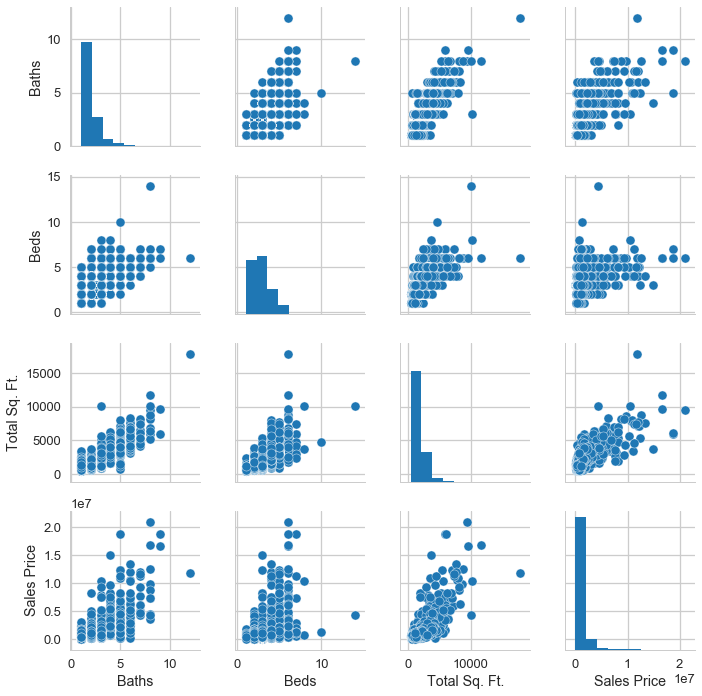

In [37]:
seaborn.pairplot(df.loc[:,['Baths','Beds','Total Sq. Ft.','Sales Price']])

In [1004]:
df.groupby(['Zip Code','Year Sold']).median()

Baths  Beds  Sales Price  Total Sq. Ft.  Year Built  \
Zip Code Year Sold                                                        
90024    2015         4.0   4.0    3535000.0         3592.0      1940.0   
         2016         3.5   4.0    2337750.0         3031.0      1937.0   
         2017         3.0   3.5    2387500.0         2495.5      1936.0   
         2018         4.0   3.0    2925000.0         3165.0      1948.0   
90026    2015         2.0   2.0     878500.0         1405.0      1925.0   
         2016         2.0   2.0     895000.0         1414.0      1928.0   
         2017         1.0   3.0     937000.0         1308.0      1925.0   
         2018         1.0   2.0     850000.0         1294.0      1923.0   
90027    2015         2.5   3.0    1335000.0         2066.0      1931.0   
         2016         3.0   3.0    1458000.0         2085.0      1936.0   
         2017         3.0   3.0    1498500.0         1990.5      1937.0   
         2018         3.0   4.5    1715125.0         2787.0      1957.0   
90039    2015         2.0   3.0     807500.0         1416.5      1931.5   
         2016         2.0   3.0     960000.0         1392.0      1932.0   
         2017         2.0   2.0     995000.0         1355.0      1930.0   
         2018         1.0   2.5     997500.0         1301.5      1926.5   
90041    2015         2.0   2.5     675000.0         1401.0      1934.5   
         2016         2.0   3.0     789000.0         1541.0      1931.0   
         2017         2.0   3.0     853000.0         1344.0      1926.0   
         2018         2.0   2.0     802500.0         1392.0      1930.0   
90049    2015         4.0   4.0    2950000.0         3416.0      1957.0   
         2016         3.5   3.0    2810000.0         2956.5      1959.0   
         2017         4.0   4.0    3575000.0         3217.5      1952.0   
90056    2015         3.0   3.0     955000.0         2652.0      1957.0   
         2016         3.0   3.0     910000.0         2437.0      1958.0   
         2017         3.0   4.0    1142500.0         2584.5      1959.5   
         2018         3.0   3.0    1149000.0         2477.0      1956.0   
90069    2015         4.0   4.0    3265000.0         3091.0      1961.0   
         2016         3.0   3.0    1850000.0         1873.0      1951.0   
         2017         3.0   3.0    2650000.0         2236.5      1957.0   
...                   ...   ...          ...            ...         ...   
94605    2017         2.0   3.0     692500.0         1625.0      1951.0   
         2018         2.0   3.0     761200.0         1717.0      1947.0   
94606    2015         2.0   3.0     545000.0         1390.0      1920.0   
         2016         2.0   3.0     500000.0         1415.0      1918.0   
         2017         1.0   3.0     595000.0         1240.0      1918.0   
         2018         1.0   3.0     539000.0         1234.0      1915.0   
94607    2015         2.0   4.0     607000.0         1643.0      1939.0   
         2016         1.0   2.0     634000.0         1000.0      1883.0   
         2017         2.0   3.0     625000.0         1253.5      1906.5   
         2018         2.0   3.0     675000.0         1207.0      1901.0   
94609    2015         2.0   3.0     870000.0         1357.5      1916.5   
         2016         1.0   3.0     868500.0         1365.5      1911.5   
         2017         1.0   3.0     900000.0         1324.0      1912.0   
         2018         1.0   2.5    1150157.5         1273.0      1910.5   
94610    2015         2.0   3.0     992500.0         2009.5      1924.0   
         2016         2.0   3.5    1316000.0         2040.5      1924.0   
         2017         2.0   3.0    1350000.0         1983.0      1924.0   
         2018         1.5   3.0    1404500.0         1570.5      1924.5   
94611    2015         2.0   3.0    1100000.0         2211.0      1955.0   
         2016         2.0   3.0    1222500.0         2265.0      1951.0   
         2017         2.0   3.0    1160000.0 

In [797]:
type((df['Last Sold'].max() - df['Last Sold'].min()).days)

int

## Investigate DataFrame:
- Do overall stats using describe
- Groupby zipcodes and do stats

In [810]:
df.describe()

,Baths,Beds,Sales Price,Stories,Total Sq. Ft.,Unfinished Sq. Ft.,Year Built,Year Renovated,Weeks,Lot Size Sq. Ft.
count,3346.0,3208.0,4236.0,2677.0,3894.0,464.0,3770.0,2850.0,4236.0,2466.0
mean,2.6,3.2,1415660.6,3.1,2190.5,504.6,1957.6,1968.3,75.9,17901.8
std,2.9,3.0,3155168.9,4.2,3256.5,599.9,31.5,26.8,45.1,52839.7
min,1.0,1.0,210.0,1.0,153.0,0.0,1875.0,1899.0,0.0,1.0
25%,1.5,2.0,545000.0,1.0,1141.0,0.0,1930.0,1953.0,37.0,4683.0
50%,2.0,3.0,954781.5,2.0,1667.5,518.0,1959.0,1971.0,75.0,7169.5
75%,3.0,4.0,1595000.0,3.0,2404.8,800.2,1980.0,1987.0,115.0,12196.8
max,59.0,59.0,172500000.0,31.0,141498.0,10000.0,2016.0,2018.0,154.0,702622.8


In [811]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4236 entries, 0 to 4892
Data columns (total 15 columns):
Baths                 3346 non-null float64
Beds                  3208 non-null float64
County                4236 non-null object
Last Sold             4236 non-null datetime64[ns]
Sales Price           4236 non-null float64
Stories               2677 non-null float64
Style                 4236 non-null object
Total Sq. Ft.         3894 non-null float64
Unfinished Sq. Ft.    464 non-null float64
Year Built            3770 non-null float64
Year Renovated        2850 non-null float64
Zip Code              4236 non-null object
rURL                  4236 non-null object
Weeks                 4236 non-null int64
Lot Size Sq. Ft.      2466 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(1), object(4)
memory usage: 689.5+ KB


In [689]:
group = df.groupby(['Style']).agg(['mean','std','sem'])
group

Baths         Beds          Sales Price             \
                           mean std sem mean  std sem        mean        std   
Style                                                                          
Condo/Co-op                 1.9 0.8 0.0  1.9  0.7 0.0   1135901.4  1116199.2   
Multi-Family (2-4 Unit)     4.3 5.2 0.4  6.0  5.8 0.4   1632218.3  1547841.8   
Multi-Family (5+ Unit)     11.5 9.5 1.0 14.0 10.1 1.1   4841726.0 14242083.0   
Single Family Residential   2.2 1.2 0.0  3.2  1.0 0.0   1349915.3  1745991.0   
Townhouse                   2.6 0.6 0.0  2.4  0.6 0.0   1135429.3   744639.1   

                                    Stories         Total Sq. Ft.          \
                                sem    mean std sem          mean     std   
Style                                                                       
Condo/Co-op                 27792.3     7.4 6.5 0.2        1228.2   574.3   
Multi-Family (2-4 Unit)     88053.6     2.2 0.8 0.1        3245.0  3092.0   
Multi-Family (5+ Unit)    1143951.6     3.6 1.9 0.2        8917.3 13389.0   
Single Family Residential   38886.3     1.4 0.6 0.0        2228.1  1264.5   
Townhouse                   47380.3     2.3 0.9 0.2        1679.6   529.3   

                                 Unfinished Sq. Ft.             Year Built  \
                             sem               mean   std   sem       mean   
Style                                                                        
Condo/Co-op                 15.7               72.6 234.2  38.5     1973.7   
Multi-Family (2-4 Unit)    179.4              243.0 486.0 243.0     1929.6   
Multi-Family (5+ Unit)    1096.9            10000.0   nan   nan     1938.6   
Single Family Residential   28.4              540.8 391.4  19.1     1950.2   
Townhouse                   34.8                0.0   0.0   0.0     1982.2   

                                   Year Renovated          Lot Size Sq. Ft.  \
                           std sem           mean  std sem             mean   
Style                                                                         
Condo/Co-op               30.4 0.9         1981.7 16.9 0.6          14610.0   
Multi-Family (2-4 Unit)   26.3 1.5         1936.0 30.0 2.1           5718.6   
Multi-Family (5+ Unit)    31.6 2.6         1964.0 21.2 2.3           6808.0   
Single Family Residential 26.7 0.6         1963.6 26.9 0.7          15918.6   
Townhouse                 20.0 1.3         1984.1 17.0 1.1          65077.5   

                                            
                               std     sem  
Style                                       
Condo/Co-op                16300.2 11526.0  
Multi-Family (2-4 Unit)     5591.9   326.1  
Multi-Family (5+ Unit)      5587.8   457.8  
Single Family Residential  41655.7   961.0  
Townhouse                 130116.2  8873.8

In [690]:
df.groupby(['Style']).agg(['mean','std','sem'])



Baths         Beds          Sales Price             \
                           mean std sem mean  std sem        mean        std   
Style                                                                          
Condo/Co-op                 1.9 0.8 0.0  1.9  0.7 0.0   1135901.4  1116199.2   
Multi-Family (2-4 Unit)     4.3 5.2 0.4  6.0  5.8 0.4   1632218.3  1547841.8   
Multi-Family (5+ Unit)     11.5 9.5 1.0 14.0 10.1 1.1   4841726.0 14242083.0   
Single Family Residential   2.2 1.2 0.0  3.2  1.0 0.0   1349915.3  1745991.0   
Townhouse                   2.6 0.6 0.0  2.4  0.6 0.0   1135429.3   744639.1   

                                    Stories         Total Sq. Ft.          \
                                sem    mean std sem          mean     std   
Style                                                                       
Condo/Co-op                 27792.3     7.4 6.5 0.2        1228.2   574.3   
Multi-Family (2-4 Unit)     88053.6     2.2 0.8 0.1        3245.0  3092.0   
Multi-Family (5+ Unit)    1143951.6     3.6 1.9 0.2        8917.3 13389.0   
Single Family Residential   38886.3     1.4 0.6 0.0        2228.1  1264.5   
Townhouse                   47380.3     2.3 0.9 0.2        1679.6   529.3   

                                 Unfinished Sq. Ft.             Year Built  \
                             sem               mean   std   sem       mean   
Style                                                                        
Condo/Co-op                 15.7               72.6 234.2  38.5     1973.7   
Multi-Family (2-4 Unit)    179.4              243.0 486.0 243.0     1929.6   
Multi-Family (5+ Unit)    1096.9            10000.0   nan   nan     1938.6   
Single Family Residential   28.4              540.8 391.4  19.1     1950.2   
Townhouse                   34.8                0.0   0.0   0.0     1982.2   

                                   Year Renovated          Lot Size Sq. Ft.  \
                           std sem           mean  std sem             mean   
Style                                                                         
Condo/Co-op               30.4 0.9         1981.7 16.9 0.6          14610.0   
Multi-Family (2-4 Unit)   26.3 1.5         1936.0 30.0 2.1           5718.6   
Multi-Family (5+ Unit)    31.6 2.6         1964.0 21.2 2.3           6808.0   
Single Family Residential 26.7 0.6         1963.6 26.9 0.7          15918.6   
Townhouse                 20.0 1.3         1984.1 17.0 1.1          65077.5   

                                            
                               std     sem  
Style                                       
Condo/Co-op                16300.2 11526.0  
Multi-Family (2-4 Unit)     5591.9   326.1  
Multi-Family (5+ Unit)      5587.8   457.8  
Single Family Residential  41655.7   961.0  
Townhouse                 130116.2  8873.8

In [691]:
df['Style'].unique()

array(['Multi-Family (2-4 Unit)', 'Single Family Residential',
       'Condo/Co-op', 'Multi-Family (5+ Unit)', 'Townhouse'], dtype=object)

In [692]:
df['Style'].nunique()

5

In [695]:
df['Style'].value_counts()

Single Family Residential    2016
Condo/Co-op                  1613
Multi-Family (2-4 Unit)       309
Townhouse                     247
Multi-Family (5+ Unit)        155
Name: Style, dtype: int64

In [701]:
df = df[df['Sales Price']<25000000]

In [702]:
df.groupby(['Style']).mean()

,Baths,Beds,Sales Price,Stories,Total Sq. Ft.,Unfinished Sq. Ft.,Year Built,Year Renovated,Lot Size Sq. Ft.
Style,,,,,,,,,
Condo/Co-op,1.9,1.9,1135901.4,7.4,1228.2,72.6,1973.7,1981.7,14610.0
Multi-Family (2-4 Unit),4.3,6.0,1632218.3,2.2,3245.0,243.0,1929.6,1936.0,5718.6
Multi-Family (5+ Unit),11.5,14.0,3496519.8,3.4,7568.7,10000.0,1938.2,1963.7,6666.5
Single Family Residential,2.2,3.2,1349915.3,1.4,2228.1,540.8,1950.2,1963.6,15918.6
Townhouse,2.6,2.4,1135429.3,2.3,1679.6,0.0,1982.2,1984.1,65077.5


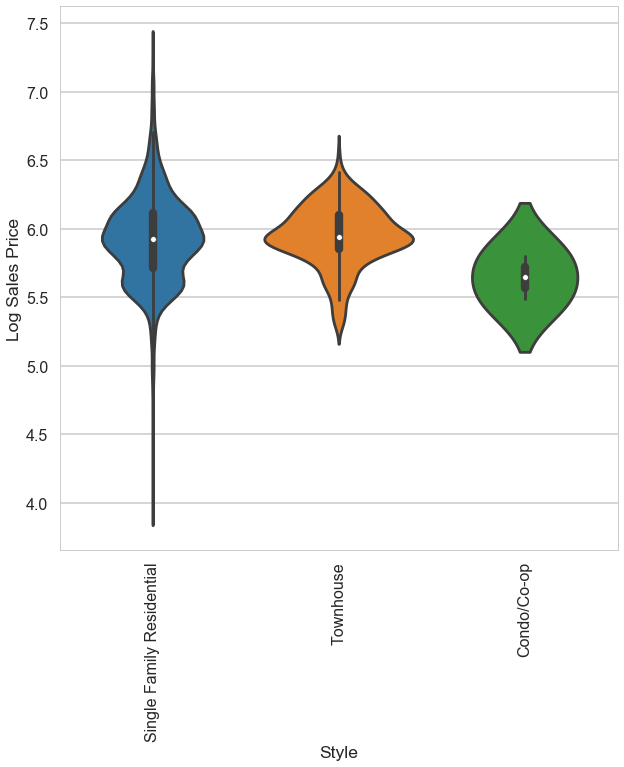

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
seaborn.violinplot(x="Style", y="Log Sales Price", data=df, jitter=False)
plt.xticks(rotation='vertical');

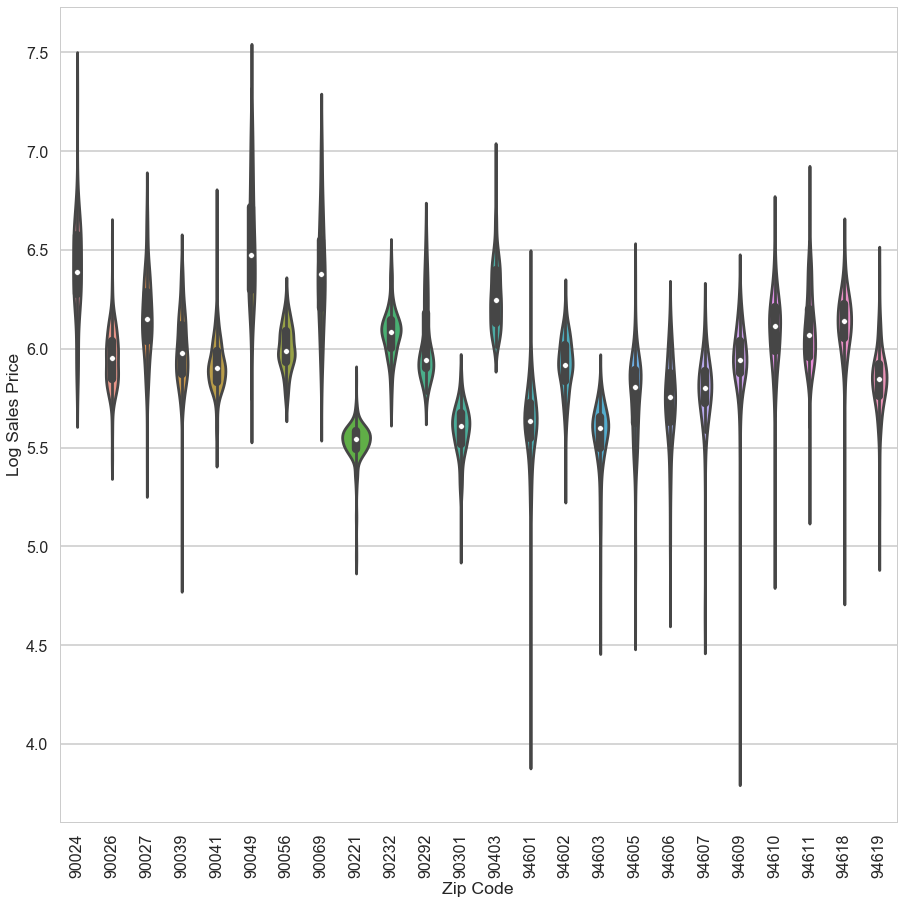

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
seaborn.violinplot(x="Zip Code", y="Log Sales Price", data=df, jitter=False)
plt.xticks(rotation='vertical');

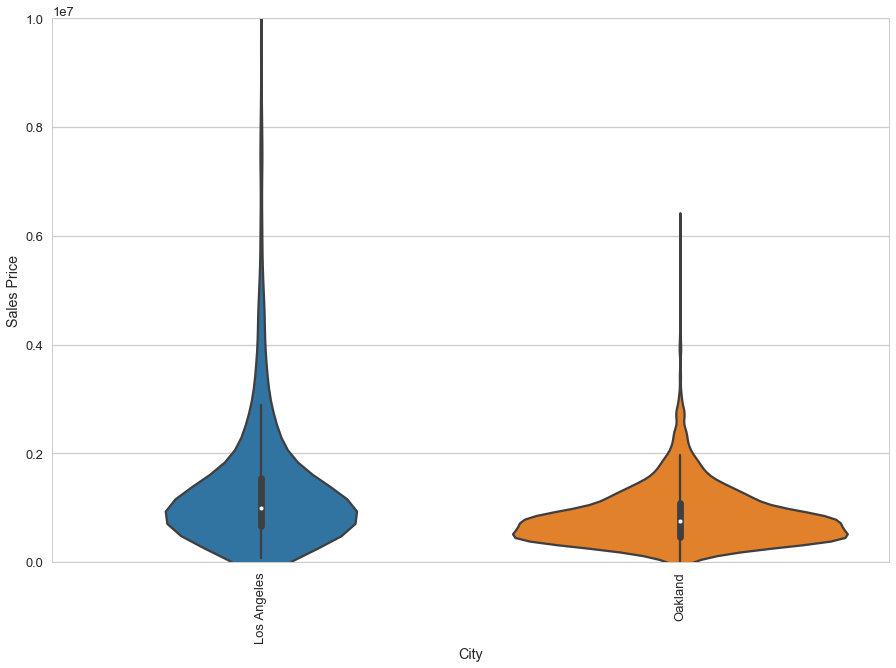

In [40]:
seaborn.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,10))
seaborn.violinplot(x="City", y="Sales Price", data=df)
plt.xticks(rotation='vertical')
plt.ylim([0,10000000]);

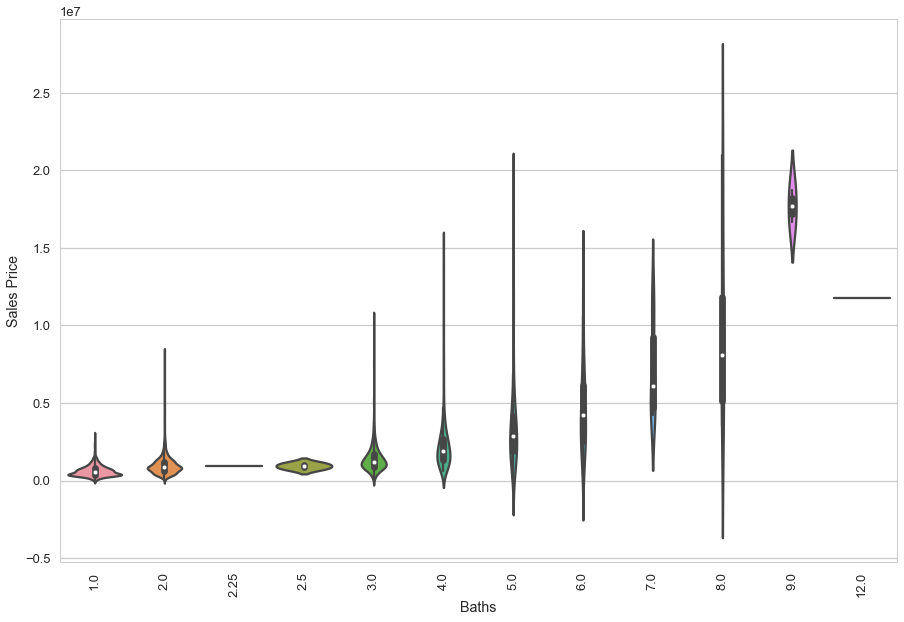

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
seaborn.violinplot(x="Baths", y="Sales Price", data=df, jitter=False)
plt.xticks(rotation='vertical');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

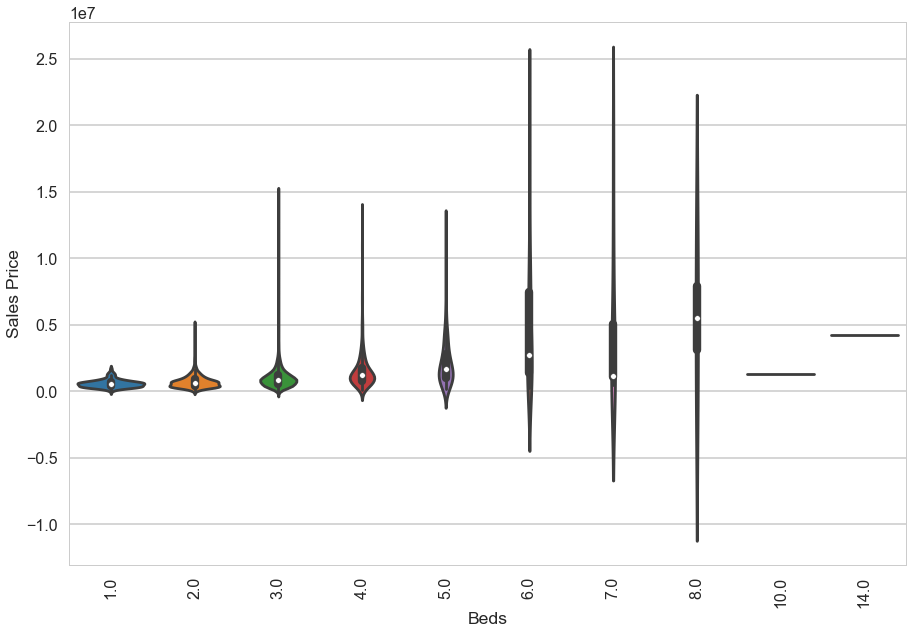

In [43]:
seaborn.set_context('poster')
fig, ax = plt.subplots(figsize=(15,10))
seaborn.violinplot(x="Beds", y="Sales Price", data=df, jitter=False)
plt.xticks(rotation='vertical')

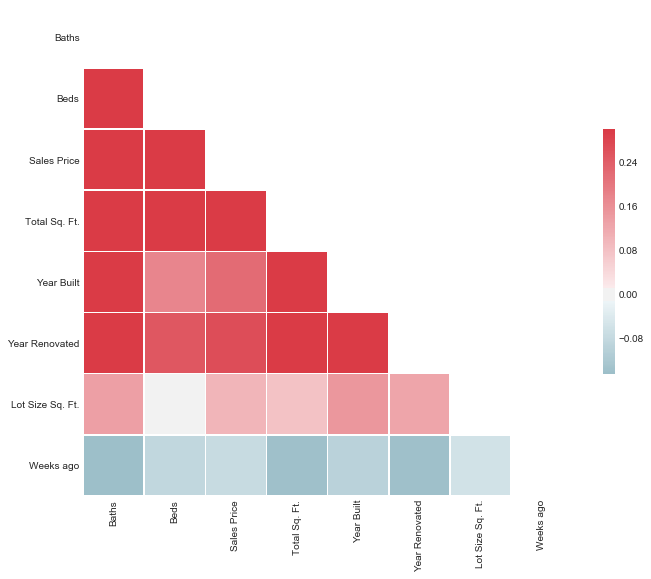

In [19]:
corr = df.loc[:,'Baths':'Weeks ago'].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

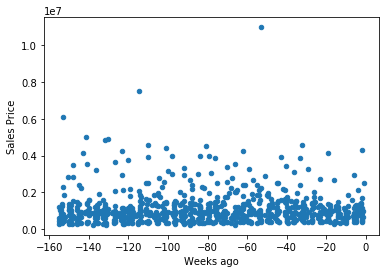

In [1020]:
df.groupby(['Zip Code', 'Year Sold', 'Month Sold']).median().plot(x='Weeks ago', y='Sales Price', kind='scatter')

In [ ]:
x = df['Weeks ago']
y = df['Sales Price']
plt.plot(x=)

In [770]:
from datetime import datetime
(df['Last Sold'] > datetime.strptime('2014-05-01', '%Y-%m-%d')).value_counts()

True     4303
False      35
Name: Last Sold, dtype: int64

## Feature Engineering:


#TODO: break out a `homepricemodels.py` script. Accepts a clean/readable data frame. Creates models, analyses, plots for EDA as well as model assessment.
- Feature Engineering functions incl.:
    - add column of `Month`
    - add columns of `Year`
    - Diagnostic plots: plot bar/hist of occurences of `Month`
    - develop grouping/function of `Season` that captures On and Off seasons?

#TODO: plan a datastructure for keeping models (dependent on redfin.py):
- Create a dict of dataframes, one df for each model: `df_dict`
- Create a dict of models, one `OLS` for each df in: `model_dict` Same keys as df_dict?
- Create plot functions that work for each model: predicted vs actual; residuals, 

### Linear Regression and Train/Test Split challenges

Ideally, try these with your own data! (Alternatively, there is the
`2013_movies.csv` data set.)

#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

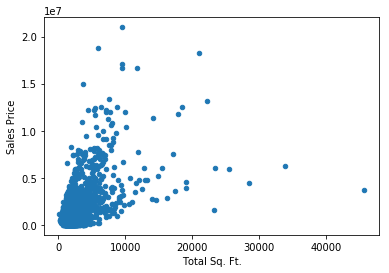

In [724]:
df[['Total Sq. Ft.','Sales Price']].plot(x='Total Sq. Ft.',y='Sales Price',kind='scatter')

Int64Index([   0,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            4882, 4883, 4884, 4885, 4887, 4888, 4889, 4890, 4891, 4892],
           dtype='int64', length=4338)

In [750]:
import statsmodels.api as sm

Y = df['Sales Price']

X = pd.Series(1, index=df['Sales Price'].index)

model = sm.OLS(X,Y).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     3070.
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:09:49   Log-Likelihood:                -4994.5
No. Observations:                4338   AIC:                             9991.
Df Residuals:                    4337   BIC:                             9997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Sales Price  3.061e-07   5.52e-09     55.406      0.000    2.95e-07    3.17e-07
==============================================================================
Omnibus:                     4000.105   Durbin-Watson:                   0.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168997.615
Skew:                          -4.404   Prob(JB):                         0.00
Kurtosis:                      32.282   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.predict(1000)

In [738]:
df['Sales Price'].mean()

1353944.7113877363

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [751]:
X = df['Total Sq. Ft.'].
Y = df['Sales Price']

model2 = sm.OLS(X,Y).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total Sq. Ft.   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 23 Apr 2018   Prob (F-statistic):                nan
Time:                        21:10:12   Log-Likelihood:                    nan
No. Observations:                4338   AIC:                               nan
Df Residuals:                    4337   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Sales Price        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""





#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.